In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [15]:
#Görüntü içe aktarımı
path = './video_ucus_3.mp4'
cap = cv2.VideoCapture(path)
frame_number = 1
while True:
    ret, frame = cap.read()
    if ret:
        frame_h = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        
        # Dış Bölge Gaussian Blur
        img_g = cv2.GaussianBlur(frame_h,ksize=(7,7),sigmaX=1)
        
        # Dış Bölge Yeşil Maskeleme
        
        greenLower=(30,100,0)
        greenUpper=(70,255,255)
        frame_m = cv2.inRange(frame_h,greenLower,greenUpper)
        
        
        
        # Dış Bölge Erozyon ve Genişletme
         
        frame_masked = cv2.erode(frame_m,None,iterations=1)
        frame_masked = cv2.dilate(frame_masked,None,iterations=2)
        
        
        
        # Dış Bölge işaretleme
        (frame_con,contours,hierarcy) = cv2.findContours(frame_masked.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        if len(contours)>0:
            
            c = max(contours,key=cv2.contourArea)
            
            
            rect = cv2.minAreaRect(c)
            
            ((x,y),(w,h),rotation) = rect
            
            box = cv2.boxPoints(rect)
            box = np.int64(box)
            
            M = cv2.moments(c)
            center = (int(M['m10']/M['m00']),int(M['m01']/M['m00']))
            
            cv2.drawContours(frame, [box], 0, (0,255,255),2)
        
        #frame_hs = frame[box[1,0]:box[3,0],box[1,1],]
        
        # İç Bölge Siyah Maske
        
        blackLower=(50,0,0)
        blackUpper=(100,60,60)
        frame_m_s = cv2.inRange(frame_h,blackLower,blackUpper)
        
        # İç bölge erozyon ve genişletme
        
        #frame_s_masked = cv2.erode(frame_m_s,None,iterations=1)
        frame_s_masked = cv2.dilate(frame_m_s,None,iterations=3)
        
        
        (frame_con,s_contours,s_hierarcy) = cv2.findContours(frame_s_masked.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        if len(s_contours)>0:
            
            c_s = max(s_contours,key=cv2.contourArea)
            
            rect_s = cv2.minAreaRect(c_s)
            
            ((x_s,y_s),(w_s,h_s),rotation_s) = rect_s
            
            box_s = cv2.boxPoints(rect_s)
            box_s = np.int64(box_s)
            
            M_s = cv2.moments(c_s)
            center_s = (int(M_s['m10']/M_s['m00']),int(M_s['m01']/M_s['m00']))
            
            cv2.drawContours(frame, [box_s], 0, (255,0,0),1)
            
            area_inner = cv2.contourArea(c_s)
            area_outer = cv2.contourArea(c)-area_inner
       
        cv2.putText(frame, ' | Dis Alan: {}  | Ic Alan: {} | {}'.format(area_outer,area_inner,frame_number),(10,40),cv2.FONT_HERSHEY_TRIPLEX,0.5,(255,255,225),1)
        cv2.circle(frame,center_s,1,(100,100,0),2)
        cv2.imshow('Tespit',frame)
        
        cv2.imshow('Tespit_G',frame_masked)
        cv2.imshow('Tespit_S',frame_s_masked)
        time.sleep(0.2)
        
        frame_number = frame_number + 1
        
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q') : break
    else : break
cap.release()
cv2.destroyAllWindows()       
        
                
        

In [16]:
box[1,0],box[1,1]

(171, 71)

In [17]:
box[3,0],box[3,1]

(202, 102)

In [18]:
frame_h

array([[[ 27,  61,  84],
        [ 27,  63,  81],
        [ 27,  67,  76],
        ...,
        [ 13,  72, 103],
        [ 13,  73, 102],
        [ 13,  73, 101]],

       [[ 27,  61,  84],
        [ 27,  63,  81],
        [ 27,  67,  76],
        ...,
        [ 13,  69, 107],
        [ 13,  70, 106],
        [ 13,  70, 105]],

       [[ 27,  61,  84],
        [ 27,  63,  81],
        [ 27,  67,  76],
        ...,
        [ 13,  67, 110],
        [ 13,  67, 110],
        [ 13,  68, 108]],

       ...,

       [[ 18,  74,  96],
        [ 18,  74,  96],
        [ 18,  75,  95],
        ...,
        [  9,  46, 160],
        [  9,  46, 161],
        [  9,  45, 164]],

       [[ 19,  81,  95],
        [ 19,  80,  96],
        [ 19,  80,  96],
        ...,
        [ 13,  45, 163],
        [ 13,  45, 164],
        [ 13,  44, 168]],

       [[ 19,  81,  94],
        [ 19,  81,  95],
        [ 19,  81,  94],
        ...,
        [ 13,  42, 176],
        [ 13,  42, 176],
        [ 13,  42, 177]]

In [19]:
frame_h[box[1,1]:box[3,1],box[1,0]:box[3,0],:]

array([[[ 14,  41,  69],
        [ 47,  50,  72],
        [ 47,  43,  83],
        ...,
        [ 32,  63,  77],
        [ 14,  70,  80],
        [ 14,  73,  77]],

       [[ 21,  50,  71],
        [ 69, 153,  75],
        [ 69, 182,  63],
        ...,
        [ 67, 195,  77],
        [ 65, 184,  72],
        [ 65, 179,  74]],

       [[ 21,  50,  72],
        [ 69, 151,  76],
        [ 69, 179,  64],
        ...,
        [ 67, 203,  74],
        [ 65, 182,  73],
        [ 65, 172,  77]],

       ...,

       [[ 16,  97,  79],
        [ 68, 205,  72],
        [ 68, 214,  69],
        ...,
        [ 64, 197,  75],
        [ 58, 174,  82],
        [ 58, 154,  93]],

       [[ 11, 103,  84],
        [ 65, 173,  68],
        [ 65, 183,  64],
        ...,
        [ 61, 168,  73],
        [ 57, 178,  70],
        [ 57, 140,  89]],

       [[ 11,  99,  88],
        [ 65, 154,  76],
        [ 65, 152,  77],
        ...,
        [ 61, 147,  83],
        [ 57, 171,  73],
        [ 57, 136,  92]]

In [20]:
frame_hs = frame_h[box[1,1]:box[3,1],box[1,0]:box[3,0],:]

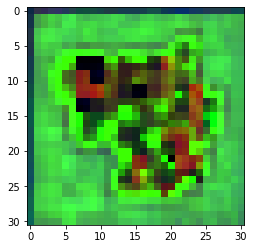

In [21]:
plt.imshow(frame_hs)

In [52]:
frame_hsre = cv2.resize(frame_hs,(100,100))

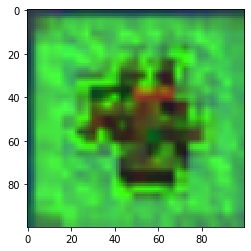

In [53]:
plt.imshow(frame_hsre)

In [ ]:
cv2.GaussianBlur(frame_hsre,)